In [72]:
import pandas as pd
import plotly.express as px

In [73]:
df=pd.read_csv('RECLAMEAQUI_IBYTE.csv')

In [74]:
df.head(5)

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             1000 non-null   int64 
 1   TEMA           1000 non-null   object
 2   LOCAL          1000 non-null   object
 3   TEMPO          1000 non-null   object
 4   CATEGORIA      1000 non-null   object
 5   STATUS         1000 non-null   object
 6   DESCRICAO      1000 non-null   object
 7   URL            1000 non-null   object
 8   ANO            1000 non-null   int64 
 9   MES            1000 non-null   int64 
 10  DIA            1000 non-null   int64 
 11  DIA_DO_ANO     1000 non-null   int64 
 12  SEMANA_DO_ANO  1000 non-null   int64 
 13  DIA_DA_SEMANA  1000 non-null   int64 
 14  TRIMETRES      1000 non-null   int64 
 15  CASOS          1000 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 125.1+ KB


In [76]:
df['TEMPO']=pd.to_datetime(df['TEMPO'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1000 non-null   int64         
 1   TEMA           1000 non-null   object        
 2   LOCAL          1000 non-null   object        
 3   TEMPO          1000 non-null   datetime64[ns]
 4   CATEGORIA      1000 non-null   object        
 5   STATUS         1000 non-null   object        
 6   DESCRICAO      1000 non-null   object        
 7   URL            1000 non-null   object        
 8   ANO            1000 non-null   int64         
 9   MES            1000 non-null   int64         
 10  DIA            1000 non-null   int64         
 11  DIA_DO_ANO     1000 non-null   int64         
 12  SEMANA_DO_ANO  1000 non-null   int64         
 13  DIA_DA_SEMANA  1000 non-null   int64         
 14  TRIMETRES      1000 non-null   int64         
 15  CASOS          1000 no

In [78]:
df['TEMPO']

0     2016-02-11
1     2016-03-12
2     2016-03-12
3     2016-04-10
4     2016-05-12
         ...    
995   2022-09-08
996   2022-10-08
997   2022-11-01
998   2022-12-07
999   2022-12-07
Name: TEMPO, Length: 1000, dtype: datetime64[ns]

<Axes: xlabel='TEMPO'>

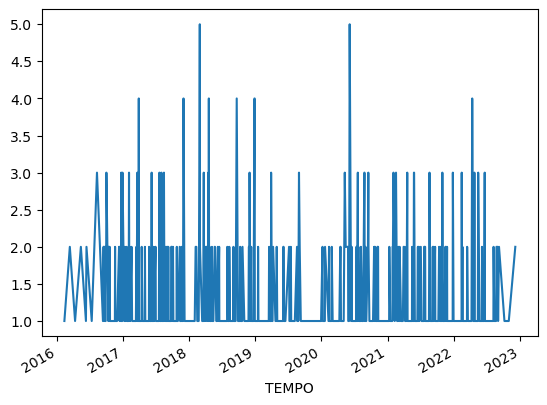

In [79]:
df.groupby('TEMPO').nunique()['ID'].plot()

In [80]:
df.STATUS.value_counts()

STATUS
Resolvido         430
Respondida        339
Em réplica        124
Não resolvido     103
Não respondida      4
Name: count, dtype: int64

In [81]:
freq_ibyte = df['STATUS'].value_counts().reset_index()
freq_ibyte.columns = ['STATUS', 'Frequencia']

In [82]:
freq_ibyte

,STATUS,Frequencia
0,Resolvido,430
1,Respondida,339
2,Em réplica,124
3,Não resolvido,103
4,Não respondida,4


In [83]:
px.bar(freq_ibyte, x='STATUS', y='Frequencia', title='Frequência dos Status', labels={'Frequencia': 'Contagem'})

In [84]:
df['LOCAL'].iloc[0]

'Hidrolândia - CE'

In [85]:
df['LOCAL'].iloc[0][-2:]

'CE'

In [86]:
df['LOCAL'].iloc[0].split('-')[1].strip()

'CE'

In [87]:
estado_lista=[]
for i in range(len(df)):
    estado_lista.append(df['LOCAL'].iloc[i].split('-',2)[1].strip())

In [88]:
estado_lista

['CE',
 'MG',
 'CE',
 'CE',
 'CE',
 'MG',
 'CE',
 'CE',
 'SP',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'Mirim',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'PE',
 'CE',
 'PI',
 'CE',
 'RN',
 'CE',
 'CE',
 'RN',
 'CE',
 'PE',
 'CE',
 'PR',
 'PE',
 'CE',
 'CE',
 'PI',
 'PE',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'MG',
 'CE',
 'PA',
 'MG',
 'CE',
 'CE',
 'GO',
 'CE',
 'CE',
 'CE',
 'SP',
 'CE',
 'SP',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'MA',
 'CE',
 'PI',
 'PE',
 'CE',
 'CE',
 'CE',
 'PE',
 'RN',
 'SP',
 'CE',
 'CE',
 'PR',
 'GO',
 'SP',
 'CE',
 'MT',
 'RS',
 'CE',
 'CE',
 'MA',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'SP',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'RN',
 'RS',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'MA',
 'CE',
 'RN',
 'CE',
 'CE',
 'CE',
 'CE',
 'CE',
 'PE',
 'MA',
 'MG',
 'RJ',
 'MG',
 'CE',
 'CE',
 'RN',
 'CE',
 'C

In [89]:
df['ESTADO']=estado_lista

In [90]:
df

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,ESTADO
0,21898349,Quebraram a tela do meu Notebook,Hidrolândia - CE,2016-02-11,Ibyte - Loja Física<->Informática,Resolvido,Em 05/10/2016 deixei meu Notebook para consert...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,2,11,42,6,3,1,1,CE
1,22581481,Solicitação de Cancelamento de Compra,Araxá - MG,2016-03-12,Não consigo fazer operação por telefone<->Cana...,Em réplica,"Prezados, efetuei uma compra no site www.ameri...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,MG
2,22579385,Inutilizarão a tela do meu notebook,Fortaleza - CE,2016-03-12,Problemas na Loja<->Ibyte - Loja Física<->Prod...,Respondida,Decidi conserta meu notebook que parou de inic...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,3,12,72,10,5,1,2,CE
3,21328791,Produto não faz o que vendedor informa!,Fortaleza - CE,2016-04-10,Ibyte - Loja Física<->Impressoras<->Produto er...,Em réplica,Venho através desde canal de reclamação expor ...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,4,10,101,14,6,2,1,CE
4,22608043,Ibyte não troca o produto,Fortaleza - CE,2016-05-12,Smartphone<->Celulares e Smartphones<->Blackfr...,Respondida,Comprei um celular na black Friday e com 4 dia...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2016,5,12,133,19,3,2,2,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,148162149,Me senti humilhado hoje,Recife - PE,2022-09-08,"Acessórios para Celulares, Tablets e Computado...",Resolvido,Hj me senti Humilhado no Shopping Guararapes P...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2022,9,8,251,36,3,3,2,PE
996,148246105,Meu notebook retornou arranhado.,Fortaleza - CE,2022-10-08,Notebooks<->Mau Atendimento<->Ibyte - Loja Fís...,Respondida,"Em Maio deste ano, meu notebook apresentou um ...",https://www.reclameaqui.com.br//ibyte-loja-fis...,2022,10,8,281,40,5,4,1,CE
997,136408859,Película com falha no corte,Castanhal - PA,2022-11-01,"Acessórios para Celulares, Tablets e Computado...",Resolvido,Comprei uma película de gel na iByte para o me...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2022,11,1,305,44,1,4,1,PA
998,146670431,Péssimo atendimento de TI na loja ibyte midway,Mossoró - RN,2022-12-07,Computadores all in one<->Mau Atendimento<->Ib...,Resolvido,na noite de 12/07/2022 comprei um monitor na l...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2022,12,7,341,49,2,4,2,RN


In [91]:
df['ESTADO'].unique()

array(['CE', 'MG', 'SP', 'Mirim', 'PE', 'PI', 'RN', 'PR', 'PA', 'GO',
       'MA', 'MT', 'RS', 'RJ', 'AP', 'PB', 'BA', 'DF', 'naoconsta', '',
       'SE', 'P', 'C', 'AM'], dtype=object)

In [92]:
df['ESTADO'].value_counts()

ESTADO
CE           622
PE            97
RN            60
MA            46
PI            43
SP            30
PB            22
PA            22
RJ            10
MG             8
DF             7
BA             6
C              4
PR             4
RS             3
GO             3
AP             2
MT             2
naoconsta      2
Mirim          2
AM             2
               1
SE             1
P              1
Name: count, dtype: int64

In [93]:
df[df["ESTADO"] == "C"]

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,ESTADO
442,42300985,PROTOCOLO: 2019.01/00001832286 GESTOR: Ministé...,JUAZEIRO DO NORTE - C,2019-01-26,Ibyte - Loja Física,Não resolvido,ReclamaçãoEm 03/01/2019 mediante a NF. 57300 n...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2019,1,26,26,4,5,1,1,C
468,90064309,Cód. do Produto: 34923 - Ar-condicionado Split...,JUAZEIRO DO NORTE - C,2019-03-28,Outros<->Mau atendimento no SAC<->Ibyte - Loja...,Não resolvido,-------- Mensagem encaminhada --------Assunto:...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2019,3,28,87,13,3,1,1,C
732,129063353,ORDEM DE COMPRA F50/026660,JUAZEIRO DO NORTE - C,2021-02-09,"Acessórios para Celulares, Tablets e Computado...",Resolvido,ÀTECNO INDUSTRIA E COMERCIO DE COMPUTADORES LT...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2021,2,9,40,6,1,1,1,C
947,143384027,Cadeira Executiva GT201 com Sistema Relax | GT,JUAZEIRO DO NORTE - C,2022-05-13,Ibyte - Loja Física<->Outro Tipo de produto/Se...,Resolvido,À GOLDENTECEm 19/01/2022 pela loja TECNO INDUS...,https://www.reclameaqui.com.br//ibyte-loja-fis...,2022,5,13,133,19,4,2,1,C


In [94]:
correcao_estados = {
    'Mirim': 'RN',
    'P': 'PE',
    'C': 'CE',
    '': 'Não Consta',
    'naoconsta': 'Não Consta'  
}

In [95]:
df['ESTADO'] = df['ESTADO'].replace(correcao_estados)

In [96]:
df['ESTADO'].unique()

array(['CE', 'MG', 'SP', 'RN', 'PE', 'PI', 'PR', 'PA', 'GO', 'MA', 'MT',
       'RS', 'RJ', 'AP', 'PB', 'BA', 'DF', 'Não Consta', 'SE', 'AM'],
      dtype=object)

In [97]:
df['ESTADO'].value_counts()

ESTADO
CE            626
PE             98
RN             62
MA             46
PI             43
SP             30
PA             22
PB             22
RJ             10
MG              8
DF              7
BA              6
PR              4
GO              3
RS              3
Não Consta      3
MT              2
AP              2
AM              2
SE              1
Name: count, dtype: int64

<Axes: xlabel='TEMPO'>

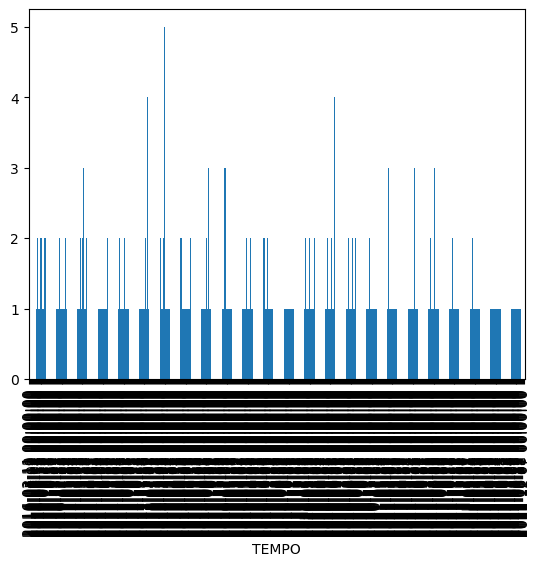

In [98]:
df[df['ESTADO']=='CE'].groupby('TEMPO').nunique()['ID'].plot(kind='bar')

In [99]:
def count_palavras(texto):
    return len(texto.split())


<Axes: ylabel='Density'>

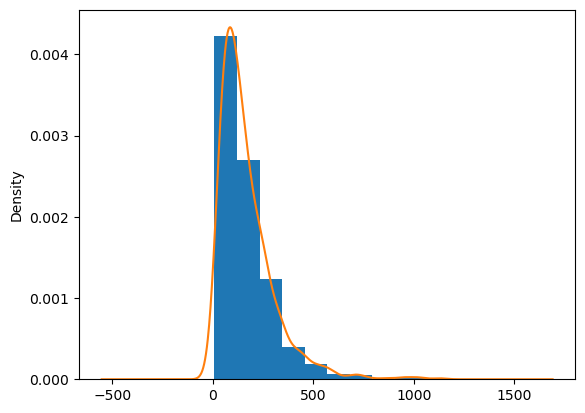

In [100]:
df['DESCRICAO'].apply(count_palavras).plot(kind='hist',density=True)
df['DESCRICAO'].apply(count_palavras).plot.kde()